# 10.1. Application

To apply EFA we will use the `factor_analyzer` package {cite}`Persson.2021`. As always, this can be installed through `pip` and you can further read through the [official documentation](https://factor-analyzer.readthedocs.io/en/latest/index.html) as linked in the README on [GitHub](https://github.com/EducationalTestingService/factor_analyzer).

When performing EFA, our objective is to find the optimal number of factors that effectively explain the relationships among a set of observed variables. The main steps involved in this process are:

1. Determining the number of factors
2. Interpreting the initial factor loadings
3. Rotating factors for better interpretation

A **factor** is a latent variable summarizing the shared variance among observed variables. EFA aims to reduce the dimensionality by retaining fewer factors than observed variables. **Factor loadings** are the relationship between each observed variable and the factor. For orthogonal factors (when factors are not correlated), these loadings can be viewed as correlations. High loadings indicate strong associations.


## Creating the Data

To demonstrate EFA, we will create a simulated dataset containing 9 variables (items). Three items each cover one underlying factor, with the items being:

- Q1: In the past two weeks, how often have you felt down, depressed, or hopeless?
- Q2: How often have you lost interest or pleasure in activities you used to enjoy?
- Q3: How often have you felt tired or had little energy over the last two weeks?
- Q4: How often have you felt nervous, anxious, or on edge in the past two weeks?
- Q5: In the past two weeks, how often have you found it difficult to relax?
- Q6: How often have you been easily annoyed or irritable in the past two weeks?
- Q7: How satisfied are you with your life as a whole?
- Q8: To what extent do you feel that your life is close to your ideal?
- Q9: In general, how happy are you with your current situation in life?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Simulate data
np.random.seed(42) # Set seed for reproducable results
n = 300 # Number of rows ("participants")

# Create the items (we assume three underlying factors with three items each)
D = np.random.normal(5, 1, n).reshape(n, 1) + np.random.normal(0, 0.5, (n, 3))
A = np.random.normal(4, 1, n).reshape(n, 1) + np.random.normal(0, 0.5, (n, 3))
LS = np.random.normal(6, 1, n).reshape(n, 1) + np.random.normal(0, 0.5, (n, 3))

# Create the df
data = np.hstack([D, A, LS])
columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']

df = pd.DataFrame(data, columns=columns)
df.head()

Q1        Q2        Q3        Q4        Q5        Q6        Q7  \
0  5.082217  5.216624  5.870361  4.514405  3.849632  3.716125  5.471667   
1  5.166921  4.851285  4.920399  3.568907  3.485502  3.343980  6.688676   
2  6.286521  5.351903  5.921237  4.470491  4.599950  4.166501  5.525764   
3  6.421934  6.414189  7.072418  5.282063  3.972453  4.446468  6.510052   
4  5.178555  5.172601  5.418586  3.690449  3.115592  4.007520  7.923384   

         Q8        Q9  
0  5.823753  6.284398  
1  6.301475  6.699365  
2  5.465271  5.277613  
3  5.319131  6.494529  
4  6.973799  7.857277

## Inspecting the Data

Before conducting a factor analysis it is worthwhile to look at the correlation matrix of the data of interest.

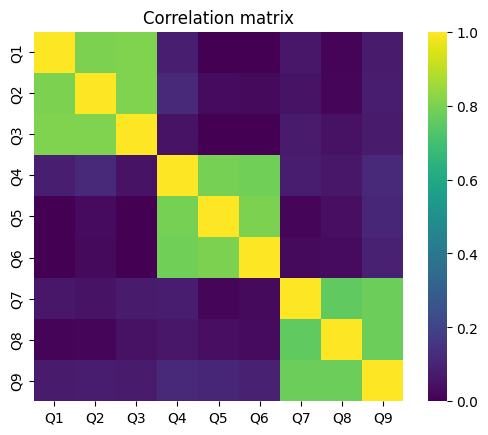

In [2]:
ax = sns.heatmap(df.corr(), cmap="viridis", square=True, vmin=0, vmax=1)
ax.set_title("Correlation matrix");

Here we can already see that the items 1-3, items 4-5 and items 6-9 correlate high with each other, respectively.


## Determining the Number of Factors

```{admonition} Learning break
:class: note

1. What is the maximum number of possible factors for our example data?
2. Given the visual inspection, how many factors do you think would make sense?
```

Several approaches are possible to determine the number of factors. Here we apply the Kaiser criterion and select as many factors as there are factors with eigenvalues > 1. Therefore, we begin by fitting a solution with the number of factors being as high as possible.

For the model we first create a `FactorAnalyzer` object and set the number of factors, the rotation, and the estimation method (in this case Maximum Likelihood):

In [3]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=9, rotation=None, method = 'ml')
fa.fit(df);

/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


We then get and plot the Eigenvalues of all factors. For each factor (in an orthogonal solution), its Eigenvalue is the sum of squared loadings across all variables, representing the **total variance that factor** explains:

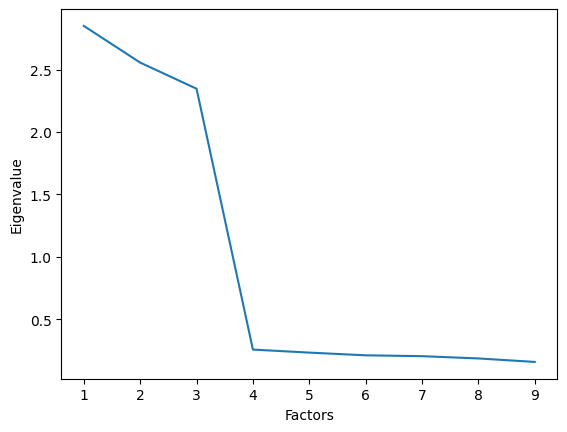

In [4]:
ev, __ = fa.get_eigenvalues()

ax = sns.lineplot(x=range(1, len(ev) + 1), y=ev)
ax.set_xlabel("Factors")
ax.set_ylabel("Eigenvalue");

We can see that three factors have Eigenvalues above 1 and we therefore choose a 3-factor solution for the final model.

*Additional information: Such a plot is called a scree plot, and we usually want to look for a "bend" in the plot. In this case, the bend corresponds to the same solution as the Kaiser criterion.*


## Fitting and Interpreting the Final Model

Before fitting the final model, one has to choose whether to use independent (orthogonal rotation) or correlated (oblique rotation) factors. In psychology, most often is has to be assumed that the constructs we measure are somewhat correlated and therefore an **oblique rotation** is often suitable. The `factor_analyzer` package offers multiple oblique rotation methods (promax, oblimin and quartimin).

In [5]:
fa2 = FactorAnalyzer(n_factors=3, rotation='promax', method='ml')
fa2.fit(df);

/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


To interpret the model the factors loadings can be printed. The resulting matrix has three columns (factors) and nine rows (items).

In [6]:
fa2.loadings_

array([[ 0.89804925, -0.0115369 , -0.00451513],
       [ 0.8968232 ,  0.04438391, -0.0102817 ],
       [ 0.89987475, -0.03552471,  0.01210906],
       [ 0.06950891,  0.87750578,  0.02016048],
       [-0.03629858,  0.90474591, -0.00802461],
       [-0.03542748,  0.89079128, -0.01190148],
       [ 0.0096525 , -0.02709577,  0.87285848],
       [-0.0330577 , -0.01986931,  0.87343536],
       [ 0.02192158,  0.04934722,  0.88621102]])

We can see that items 1-3 load mostly onto factor 1, items 4-6 load mostly onto factor 2 and items 7-9 load mostly onto factor 3. 
**Note**: Factor loadings are similar to standardized regression coefficients, and variables with higher loadings on a particular factor can be interpreted as explaining a larger proportion of the variation in that factor.

To evaluate how good the model is one might look at the communalities. Communalities range from 0 to 1 and tell you the variance of each observed variable accounted for by all extracted factors combined.

In [7]:
fa2.get_communalities()

array([0.80664595, 0.80636749, 0.8111832 , 0.77525434, 0.81994715,
       0.79490585, 0.76270927, 0.76437693, 0.78828568])

As the communalities are quite high for all variables we can conclude that the model fits the data well.